## Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.


### Инструкция по выполнению проекта
#### Шаг №1. Загрузите данные и подготовьте их к анализу
Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.


#### Шаг №2. Анализ данных
* Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
* Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
* Для какого вида объекта общественного питания характерно сетевое распространение?
* Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
* Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
* Выделите в отдельный столбец информацию об улице из столбца address .
* Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
* Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
* Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.


#### Шаг №3. Подготовка презентации
Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в markdown-ячейке в формате:

Скопировать кодMARKDOWN

Презентация: <ссылка на облачное хранилище с презентацией> 

Следуйте принципам оформления из темы «Подготовка презентации».

#### Описание данных
Таблица rest_data:
* `id` — идентификатор объекта;
* `object_name` — название объекта общественного питания;
* `chain` — сетевой ресторан;
* `object_type` — тип объекта общественного питания;
* `address` — адрес;
* `number` — количество посадочных мест.

## Анализ и предобработка данных

In [1]:
# импорт библиотк
# import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
# from scipy import stats as st
# import datetime as dt
from plotly import graph_objects as go

########################################
import plotly.io as pio
png_renderer = pio.renderers["png"]
png_renderer.width = 1000
png_renderer.height = 1000

pio.renderers.default = "png"

In [2]:
# rest_data = pd.read_csv("/datasets/rest_data.csv")
rest_data = pd.read_csv("https://code.s3.yandex.net/datasets/rest_data.csv")
# 1. выводи инфо о данных
# 2. проверка дубликатов и условное удаление дубликатов из данных
# 3. проверка пропусков в данных
# 4. отработка приведения колонок в данных к стилю "snake_style" и проверка

dfs_dict = {'rest_data':rest_data}
for name_, df_ in dfs_dict.items():
    print('\033[1m'+f'INFO {name_}'+'\033[0m', end='\n\n')
    print(df_.info(), end='\n\n')
    print('\033[1m'+f'Initial Duplicates in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    if df_.duplicated().sum() > 0:
        df_.drop_duplicates()
        print('\033[1m'+f'Final Duplicates  in {name_}: '+'\033[0m', df_.duplicated().sum(), end='\n\n')
    print('\033[1m'+f'Number of NULLs in {name_}:'+'\033[0m\n', df_.isna().sum(), end='\n\n')
    df_.columns = df_.columns.str.lower().str.replace(' ', '_')
    print('\033[1m'+f'Columns in {name_}:'+'\033[0m\n', df_.columns)
    display(df_.head(3))
    print('='*60)


INFO rest_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None

Initial Duplicates in rest_data:  0

Number of NULLs in rest_data:
 id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

Columns in rest_data:
 Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95


### **Вывод**
* данные представлены в одном файле
* пропуски и дубликаты отсутствуют
* название колонок проработаны на соответствие ***snake_style***
* данные "название объекта", "принадлежность к сети", "тип объекта" и "адрес" представлены в виде строк
* id и кол-во мест для посетителей представлены в виде целых чисел

Обратим внимание на название заведений

In [3]:
rest_data.object_name = rest_data.object_name.str.lower()
pd.set_option('display.max_rows', 200)
rest_data_init = rest_data.object_name.value_counts()
rest_data.object_name.value_counts().to_frame().head()

,object_name
столовая,321
кафе,278
шаурма,250
шоколадница,158
kfc,155


Проверим, есть ли совпадения в названиях заведений по ключевому слову на примере "теремок"

In [4]:
rest_data.query('object_name.str.contains("теремок")', engine='python').object_name.unique()

array(['теремок', 'предприятие быстрого обслуживания «теремок»',
       'теремок инвест', 'кафе «теремок»', 'кафе теремок',
       'ресторан теремок', 'теремок-инвест', 'ресторан «теремок»',
       'закусочная «теремок»', 'пбо «теремок»', 'восточный теремок'],
      dtype=object)

Составим словарь для приведения названия заведений к единому

***примечание***: для избежания избыточного фильтра исключим общеупотребляемые слова (кафе, хлеб и подобные)

In [5]:
rest_data.groupby('object_name', as_index=False).id.count().sort_values('id', ascending=False).head(200).reset_index(drop=True)

,object_name,id
0,столовая,321
1,кафе,278
2,шаурма,250
3,шоколадница,158
4,kfc,155
5,макдоналдс,151
6,бургер кинг,137
7,теремок,94
8,крошка картошка,90
9,домино'с пицца,90


In [6]:
name_dict = {
    'kfc':'kfc',
    'макдоналдс':'макдоналдс',
    'бургер кинг':'бургер кинг',
    'шоколадница':'шоколадница',
    'макдоналдс':'макдоналдс',
    'mcdonalds':'макдоналдс',
    "домино'с пицца":"домино'с пицца",
    'yakitoriya':'якитория',
    'якитория':'якитория',
    'додо пицца':'додо пицца',
    'subway':'subway',
    'сабвей':'subway',
    'сабвэй':'subway',
    'tanuki':'тануки',
    'теремок':'теремок',
    'старбакс':'starbucks',
    'starbucks':'starbucks',
    'lukoil':'лукойл',
    'лукойл':'лукойл',
    'магбургер':'магбургер',
    'mcburger':'магбургер'   ,
    'папа джонс':'папа джонс',
    "шаурма":"шаурма",
    "теремок":"теремок",
    "домино'с пицца":"домино'с пицца",
    "крошка картошка":"крошка картошка",
    "суши wok":"суши wok",
    "милти":"милти",
    "starbucks":"starbucks",
    "додо пицца":"додо пицца",
    "якитория":"якитория",
    "кофе с собой":"кофе с собой",
    "школьно-базовая столовая":"школьно-базовая столовая",
    "чайхона №1":"чайхона №1",
    "донер кебаб":"донер кебаб",
    "хинкальная":"хинкальная",
    "кофе хаус":"кофе хаус",
    "тануки":"тануки",
    "хлеб насущный":"хлеб насущный",
    "прайм стар":"прайм стар",
    "иль патио":"иль патио",
    "cofix":"cofix",
    "му-му":"му-му",
    "мята lounge":"мята lounge",
    "донер":"донер",
    "андерсон":"андерсон",
    "пицца хат":"пицца хат",
    "чайхона":"чайхона",
    "комбинат питания мгту им.н.э.баумана":"комбинат питания мгту им.н.э.баумана",
    "кулинарная лавка братьев караваевых":"кулинарная лавка братьев караваевых",
    "французская пекарня":"французская пекарня",
    "кофемания":"кофемания",
    "пицца паоло":"пицца паоло",
    "алло пицца":"алло пицца",
    "вьетнамская кухня":"вьетнамская кухня",
    "азбука вкуса":"азбука вкуса",
    "столовая при гбоу школа 171":"столовая при гбоу школа 171",
    "сушишоп":"сушишоп",
    "кружка":"кружка",
    "стардогs":"стардогs",
    "штолле":"штолле",
    "шаурма, выпечка":"шаурма, выпечка",
    "суши сет":"суши сет",
    "закусочная":"закусочная",
    "суши вок":"суши вок",
    "каменев василий владимирович":"каменев василий владимирович",
    "баскин роббинс":"баскин роббинс",
    "lift":"lift",
    "столовая при школе № 2107":"столовая при школе № 2107",
    "кафе «хинкальная»":"кафе «хинкальная»",
    "волконский":"волконский",
    "кп мэи":"кп мэи",
    "столовая при гбоу школа 1231":"столовая при гбоу школа 1231",
    "ваби-саби":"ваби-саби",
    "столовая «ооо вито-1»":"столовая «ооо вито-1»",
    "джон джоли":"джон джоли",
    "прайм":"прайм",
    "грабли":"грабли",
    "вареничная №1":"вареничная №1",
    "даблби":"даблби",
    "французская выпечка":"французская выпечка",
    "гриль хаус":"гриль хаус",
    "братья караваевы":"братья караваевы",
    "корчма тарас бульба":"корчма тарас бульба",
    "cinnabon":"cinnabon",
    "колбасофф":"колбасофф",
    "то да сё":"то да сё",
    "воккер":"воккер",
    "иль патио планета суши":"иль патио планета суши",
    "лиор":"лиор",
    "лобби-бар":"лобби-бар",
    "самарканд":"самарканд",
    "пицца экспресс":"пицца экспресс",
    "москальян":"москальян",
    "пивной бар":"пивной бар",
    "чебуречная":"чебуречная",
    "суши стор":"суши стор",
    "правда кофе":"правда кофе",
    "лукойл":"лукойл",
    "магбургер":"магбургер",
    "ресторан":"ресторан",
    "брусника":"брусника",
    "вкус востока":"вкус востока",
    "dominos pizza":"dominos pizza",
    "кафе на азс":"кафе на азс",
    "донеретт":"донеретт",
    "мята":"мята",
    "krispy creme":"krispy creme",
    "донер-кебаб":"донер-кебаб",
    "три правила":"три правила",
    "шаурмания":"шаурмания",
    "сушиstore":"сушиstore",
    "столовая гбоу школа № 1517":"столовая гбоу школа № 1517",
    "прайм-кафе":"прайм-кафе",
    "кафе-столовая":"кафе-столовая",
    "гп кп мгаи":"гп кп мгаи",
    "шаурма, куры-гриль":"шаурма, куры-гриль",
    "джаганнат":"джаганнат",
    "ташир пицца":"ташир пицца",
    "урюк":"урюк",
    "осетинские пироги":"осетинские пироги",
    "гбоу школа №1468":"гбоу школа №1468",
    "стардогс":"стардогс",
    "ливан-хаус":"ливан-хаус",
    "вьеткафе":"вьеткафе",
    "правdа кофе":"правdа кофе",
    "гамбринус":"гамбринус",
    "столовая гбоу «курчатовская школа»":"столовая гбоу «курчатовская школа»",
    "бургерная":"бургерная",
    "руккола":"руккола",
    "шикари":"шикари",
    "сити пицца":"сити пицца",
    "академия":"академия",
    "столовая гбоу школа № 1560 «лидер»":"столовая гбоу школа № 1560 «лидер»",
    "кафе хинкальная":"кафе хинкальная",
    "пекарня 24":"пекарня 24",
    "мимино":"мимино",
    "две палочки":"две палочки",
    "выпечка, шаурма":"выпечка, шаурма",
    "гбоу школа № 1598":"гбоу школа № 1598",
    "столовая при школе 2097":"столовая при школе 2097",
    "кулинарная лавка братьев караваевых братья караваевы":"кулинарная лавка братьев караваевых братья караваевы",
    "дагестанская лавка":"дагестанская лавка",
    "нияма":"нияма",
    "шантимель":"шантимель",
    "тандыр":"тандыр",
    "бургер рус":"бургер рус",
    "дабл би":"дабл би",
    "суши маркет":"суши маркет",
    "шашлычная":"шашлычная",
    "чебуречная ссср":"чебуречная ссср",
    "му-му":"му-му",
    "dunkin donuts":"dunkin donuts",
    "кафе «андерсон»":"кафе «андерсон»",
    "мясо в лаваше":"мясо в лаваше",
    "предприятие быстрого питания":"предприятие быстрого питания",
    "горячая выпечка":"горячая выпечка",
    "менза":"менза",
    "пончики":"пончики",
    "тирольские пироги":"тирольские пироги",
    "маки-маки":"маки-маки",
    "батони":"батони",
    "мск московская сеть кальянных":"мск московская сеть кальянных",
    "закусочная «донеретто»":"закусочная «донеретто»",
    "столовая гбоу сош №1571":"столовая гбоу сош №1571",
    "moskalyan":"moskalyan",
    "панчо пицца":"панчо пицца",
    "гацоева анжела камалдиновна":"гацоева анжела камалдиновна",
    "бистро 24":"бистро 24",
    "донеретто":"донеретто",
    "изи паб":"изи паб",
    "оазис":"оазис",
    "скалка":"скалка",
    "буфет гбоу «школа №117»":"буфет гбоу «школа №117»",
    "кафе «бистро»":"кафе «бистро»",
    "гбоу школа № 319":"гбоу школа № 319",
    "столовая гбпоу зкно":"столовая гбпоу зкно",
    "халяль":"халяль",
    "жан жак":"жан жак",
    "гбоу школа № 1236":"гбоу школа № 1236",
    "wok & box":"wok & box",
    "кебаб хаус":"кебаб хаус",
    "ресторан «чайхона №1»":"ресторан «чайхона №1»",
    "upside down cake":"upside down cake",
    "silver panda":"silver panda",
    "кафе-бистро":"кафе-бистро",
    "пицца фабрика":"пицца фабрика",
    "jeffreys coffee":"jeffreys coffee",
    "costa coffee":"costa coffee",
    "сыто пьяно":"сыто пьяно",
    "ресторан «иль патио»":"ресторан «иль патио»",
    "кафе при азс":"кафе при азс",
    "кофе тун":"кофе тун",
    "кофе-хаус":"кофе-хаус",
    "роснефть":"роснефть",
    "yogurt frenzy":"yogurt frenzy",
    "tutti frutti frozen yogurt":"tutti frutti frozen yogurt",
    "lavkalavka":"lavkalavka",
    "пицца pomodoro":"пицца pomodoro",
    "сбарро":"сбарро"

}

In [7]:
# ф-ция замены
def replace(name):
    for search_name in name_dict:
        if search_name in name:
            return name_dict[search_name]   
    return name
rest_data['object_name'] = rest_data['object_name'].apply(replace)

rest_data2 = rest_data.object_name.value_counts()
print(f'Обработано {abs(len(rest_data2) - len(rest_data_init))} в названиях точек питания')

Обработано 1184 в названиях точек питания


Повторно проверим дубликаты

In [8]:
rd_ = rest_data.copy()
rd_.address = rd_.address.str.lower()
rd_.duplicated().sum()

0

Дубликаты янвые и неявные отсуствуют

In [9]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [10]:
# проверка на уникальность id
rest_data.id.value_counts().to_frame().sort_values('id', ascending=False).head()

,id
151635,1
23056,1
21065,1
23670,1
24309,1


In [11]:
print('id < 0: кол-во: ',len(rest_data.query('id < 0', engine='python')))
print('Посадочных мест < 0: кол-во: ',len(rest_data.query('number < 0', engine='python')))

id < 0: кол-во:  0
Посадочных мест < 0: кол-во:  0


In [12]:
# описание данных "кол-во посадочных мест"
rest_data.number.describe().T.to_frame()

,number
count,15366.000000
mean,59.547182
std,74.736833
min,0.000000
25%,12.000000
50%,40.000000
75%,80.000000
max,1700.000000


In [13]:
max1 = rest_data.number.describe()["max"]
rest_data.query("number == @max1").address.tolist() #без tolist() полностью не выводится )))

['город Москва, Кутузовский проспект, дом 36, строение 11']

## Соотношение типов объектов общественного питания по количеству

In [14]:
type_share = rest_data.groupby('object_type', as_index=False).id.count()
type_share['type_share'] = (type_share.id / len(rest_data)).map(lambda x: '{:.2%}'.format(x))
type_share = type_share.rename(columns={'id':'count'}).sort_values('count', ascending=False).reset_index(drop=True)
type_share

,object_type,count,type_share
0,кафе,6099,39.69%
1,столовая,2587,16.84%
2,ресторан,2285,14.87%
3,предприятие быстрого обслуживания,1923,12.51%
4,бар,856,5.57%
5,буфет,585,3.81%
6,кафетерий,398,2.59%
7,закусочная,360,2.34%
8,магазин (отдел кулинарии),273,1.78%


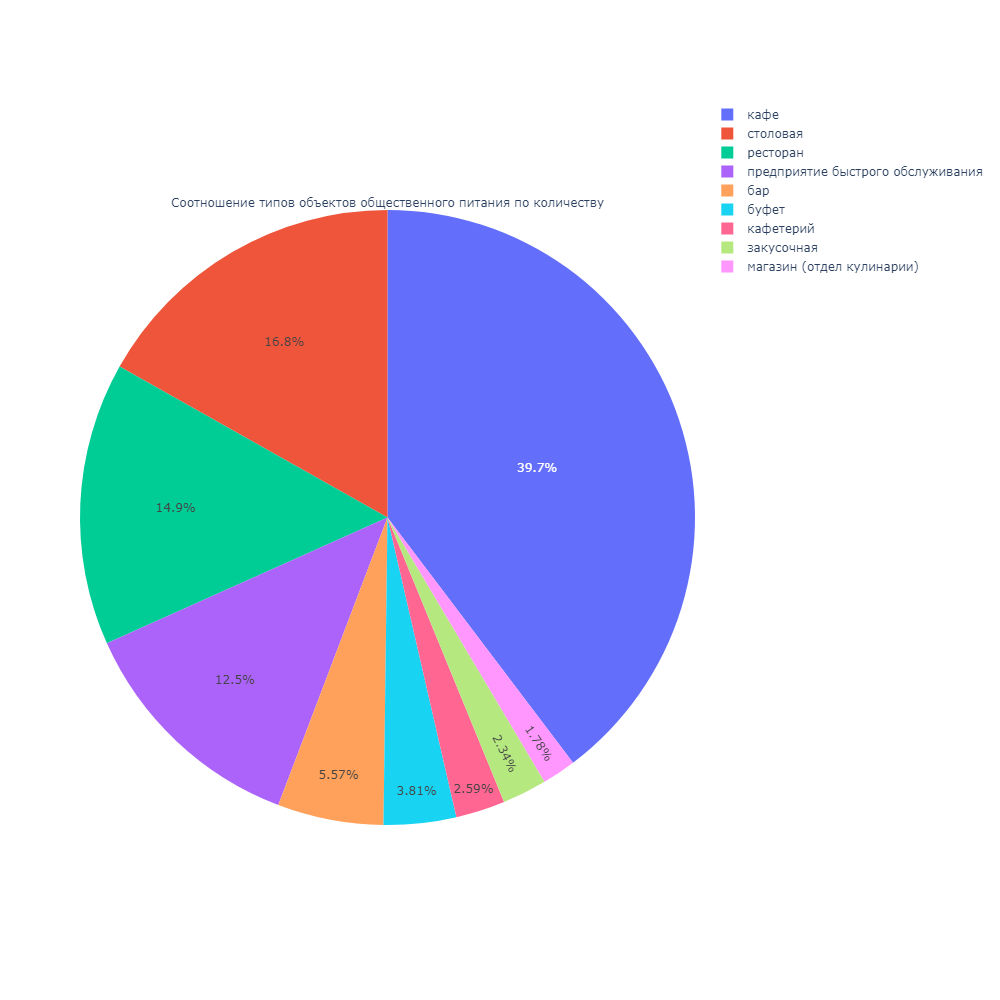

In [15]:
# import kaleido 
# import plotly.io as pio
# png_renderer = pio.renderers["png"]

fig = go.Figure(data=[go.Pie(labels=type_share.object_type, values=type_share['count'], \
                           title='Соотношение типов объектов общественного питания по количеству' )])
fig.show()

### **Вывод**
* Максимальные доли типов объектов по количеству посадочных мест занимают: кафе - 39,7%, столовые - 16,8%, рестораны - 14,9%
* Минимальные: магазины с отделами кулинарии - 1,78%, закусочные - 2,34% и кафетерии - 2,59%

## Соотношение сетевых и несетевых заведений по количеству

In [16]:
chain_share = rest_data.groupby('chain', as_index=False).id.count()
chain_share['chain_share'] = (chain_share.id / len(rest_data)).map(lambda x: '{:.2%}'.format(x))
chain_share = chain_share.rename(columns={'id':'count'}).sort_values('count', ascending=False).reset_index(drop=True)
chain_share

,chain,count,chain_share
0,нет,12398,80.68%
1,да,2968,19.32%


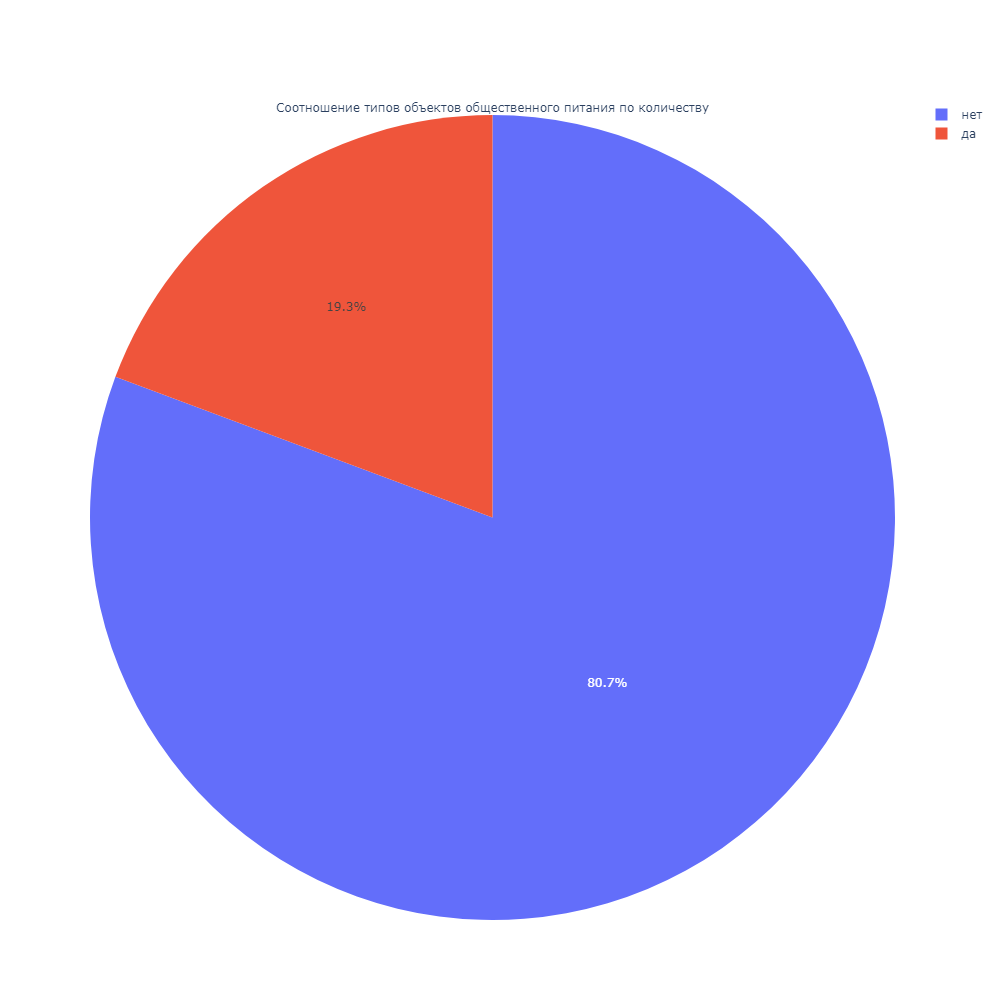

In [17]:
fig = go.Figure(data=[go.Pie(labels=chain_share.chain, values=chain_share['count'], \
                           title='Соотношение типов объектов общественного питания по количеству' )])
fig.show()

### **Вывод**
* 80,7% рынка по количеству занимают несетевые объекты, 19,3% - сетевые

## Для каких типов объектов больше соответствует сетевое распределение

In [18]:
# Типы сетевых объектов
chains = rest_data.query('chain == "да"').groupby('object_type', as_index=False).id.count()
chains = chains.rename(columns={'id':'count'}).sort_values('object_type', ascending=False).reset_index(drop=True)
chains

,object_type,count
0,столовая,3
1,ресторан,544
2,предприятие быстрого обслуживания,791
3,магазин (отдел кулинарии),78
4,кафетерий,52
5,кафе,1396
6,закусочная,56
7,буфет,11
8,бар,37


In [19]:
# типы объектов в общем датасете
groups = rest_data.groupby('object_type', as_index=False).id.count().sort_values('id', ascending=False)
groups = groups.rename(columns={'id':'count'}).sort_values('object_type', ascending=False).reset_index(drop=True)
groups

,object_type,count
0,столовая,2587
1,ресторан,2285
2,предприятие быстрого обслуживания,1923
3,магазин (отдел кулинарии),273
4,кафетерий,398
5,кафе,6099
6,закусочная,360
7,буфет,585
8,бар,856


In [20]:
# Доля сетевых
chains['chain_level'] = (chains['count'] / groups['count'])
chains = chains.sort_values('chain_level', ascending=False).reset_index(drop=True)
chains['chain_level_%'] = chains.chain_level.map(lambda x: '{:.2%}'.format(x))
chains

,object_type,count,chain_level,chain_level_%
0,предприятие быстрого обслуживания,791,0.411336,41.13%
1,магазин (отдел кулинарии),78,0.285714,28.57%
2,ресторан,544,0.238074,23.81%
3,кафе,1396,0.228890,22.89%
4,закусочная,56,0.155556,15.56%
5,кафетерий,52,0.130653,13.07%
6,бар,37,0.043224,4.32%
7,буфет,11,0.018803,1.88%
8,столовая,3,0.001160,0.12%


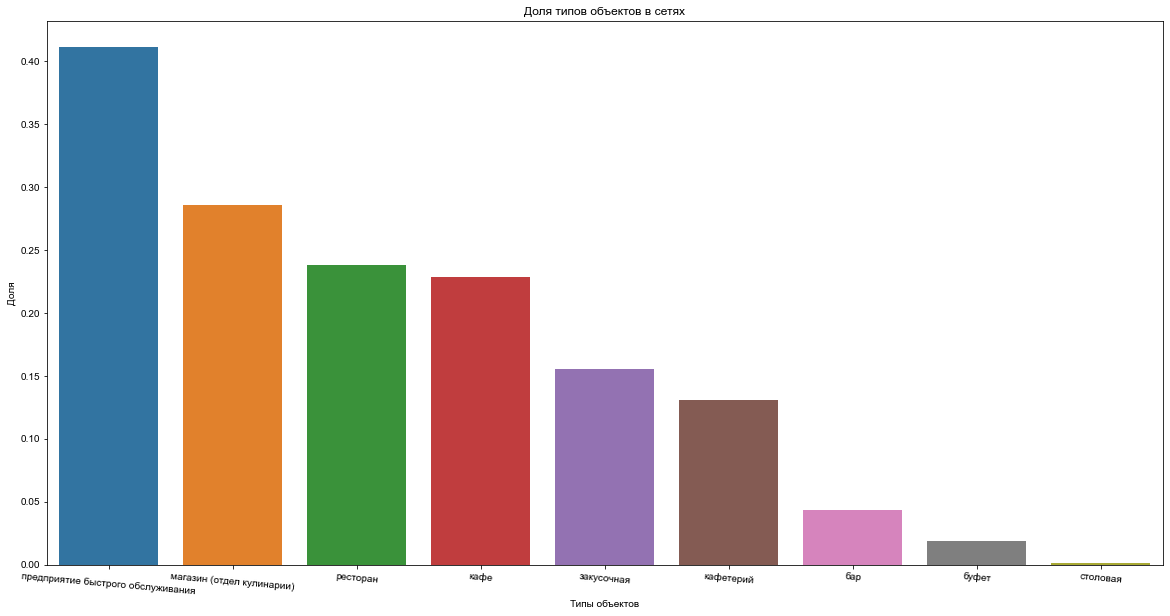

In [21]:
fig, ax = plt.subplots()
ax = sns.barplot(x='object_type', y='chain_level',   data=chains)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-5)
ax.set_title('Доля типов объектов в сетях')
ax.set_xlabel('Типы объектов')
ax.set_ylabel('Доля') 
# ax.legend(chains.object_type)
sns.set_style("dark")
fig.set_figheight(10)  # высота
fig.set_figwidth(20)  # ширина

In [22]:
print('Кол-во типов объектов СЕТЕВЫХ: ', len(set(rest_data.query('chain == "да"').object_type.to_list())))
print('Кол-во типов объектов НЕСЕТЕВЫХ: ', len(set(rest_data.query('chain == "нет"').object_type.to_list())))

Кол-во типов объектов СЕТЕВЫХ:  9
Кол-во типов объектов НЕСЕТЕВЫХ:  9


Все типы объектов присутствуют как в СЕТЕВЫХ, так и в НЕСЕТВЫХ

### **Вывод**
* к сетевому формату тяготеют такие типы объектов питания, как предприятия быстрого питания, магазины (отдел кулинарии), рестораны и кафе

## Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [23]:
df_ = rest_data.query('chain == "да"').groupby('object_name', as_index=False).agg({'id':'count','number':'median'})
df_.columns = ['object_name', 'quantity', 'seat_nums']
df_.head()

,object_name,quantity,seat_nums
0,beverly hills diner,1,88.0
1,bierloga,1,75.0
2,black & white,1,40.0
3,bocconcino,3,68.0
4,boobo,1,46.0


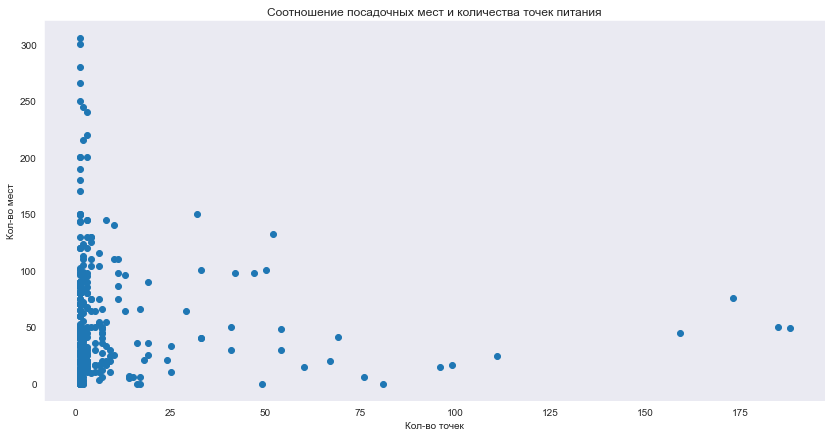

In [24]:
plt.figure(figsize=(14,7))
plt.title('Соотношение посадочных мест и количества точек питания')
plt.xlabel('Кол-во точек')
plt.ylabel('Кол-во мест')
plt.scatter(x="quantity", y="seat_nums", data=df_);

Кол-во посадочных мест в находится в обратной зависимости от кол-ва точек питания: то есть чем больше точек питания, то в основном меньше посадочных мест 

Обратим внимание на кол-во посадочных мест в каждой точке

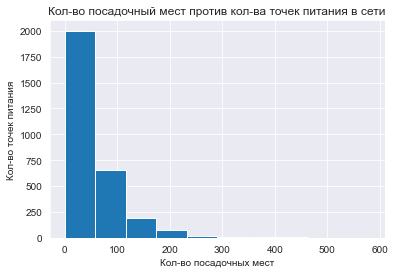

In [25]:
rest_data.query('chain == "да"').number.hist()
plt.xlabel('Кол-во посадочных мест')
plt.ylabel('Кол-во точек питания')
plt.title('Кол-во посадочный мест против кол-ва точек питания в сети')
plt.show()

In [26]:
rest_data.query('chain == "да"').sort_values('number').head()

,id,object_name,chain,object_type,address,number
15140,222301,стардогs,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 33, ...",0
12255,181039,кофе с собой,да,предприятие быстрого обслуживания,"город Москва, 2-й Кожевнический переулок, дом 1",0
15157,206911,cofix,да,кафе,"город Москва, улица Рождественка, дом 6/9/20, ...",0
9639,167481,макдоналдс,да,ресторан,"город Москва, город Московский, улица Хабарова...",0
9636,164396,кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 33, ...",0


Существуют точки, в которых посадочных мест нет. Это ошибка, и исправить ее затруднительно, поэтому отбросим эти точки

Обратим внимание на кол-во точек в одной сети


In [27]:
df_ = rest_data.query('chain == "да"').groupby('object_name', as_index=False).id.count().sort_values('id')
df_.columns = ['object_name', 'seat_nums']
df_.head()

,object_name,seat_nums
0,beverly hills diner,1
155,кафе «чайхана тапчан»,1
156,кафе космик,1
157,кафе мороженного «tutti frutti»,1
158,кафе пекарня хачапури,1


Существуют сети, в которых только одна точка.
* в случае ошибки исправить такие данные также затруднительно, как и предыдущем пункте
* на момент предоставления данных такие сети по сути не являются сетями

в следствие этого так же не будем их рассматривать

построим распределение мест и кол-ва точек для отфильтрованных данных

In [28]:
chains = rest_data.query('chain == "да" & number > 1')
chains.sort_values('number').head()

,id,object_name,chain,object_type,address,number
10806,183291,healthy food,да,кафе,"город Москва, 3-я Рыбинская улица, дом 18, стр...",2
15270,205523,милти,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 26, строен...",2
15264,211308,милти,да,предприятие быстрого обслуживания,"город Москва, Дмитровское шоссе, дом 89",2
9880,170679,крошка картошка,да,предприятие быстрого обслуживания,"город Москва, Краснопрудная улица, дом 1",2
9891,170412,суши wok,да,кафе,"город Москва, Комсомольский проспект, дом 28",2


In [29]:
df_ = chains.groupby('object_name', as_index=False).agg({'id':'count','number':'median'})
df_.columns = ['object_name', 'quantity', 'seat_nums']
df_ = df_.query('quantity > 1')
df_.head()

,object_name,quantity,seat_nums
3,bocconcino,3,68.0
6,burger club,3,20.0
7,coffeeshop company,4,50.0
8,cofix,18,11.0
10,correas,3,32.0


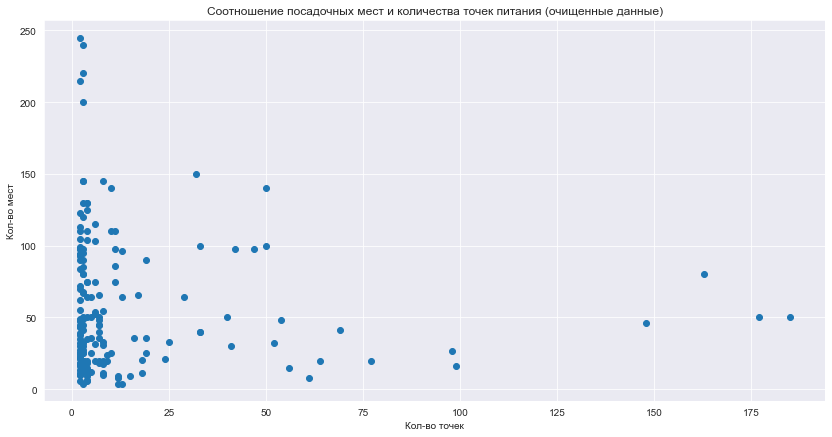

In [30]:
plt.figure(figsize=(14,7))
plt.title('Соотношение посадочных мест и количества точек питания (очищенные данные)')
plt.xlabel('Кол-во точек')
plt.ylabel('Кол-во мест')
plt.grid()
plt.scatter(x="quantity", y="seat_nums", data=df_);

In [31]:
df_.quantity.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
quantity,174.0,14.62069,29.304162,2.0,2.0,4.0,10.75,185.0


### **Вывод**
Меньшему кол-ву точек питания соотв-ет большое число посадочных мест.

А также:
* более половины сетевых структур питания имеет до 11 посадочных мест
* Медианное значение посадочных мест - 14,6
* Среднее кол-во посадочных мест - 4
* данные представлены для 174 компаний

## Среднее кол-во посадочных мест по типам объектов

In [32]:
rest_data.query('number > 0').groupby('object_type', as_index=False).number.mean().sort_values('number', ascending=False)

,object_type,number
8,столовая,131.210280
7,ресторан,98.779464
1,буфет,57.854932
0,бар,44.964976
3,кафе,41.842805
6,предприятие быстрого обслуживания,32.421657
2,закусочная,16.017544
4,кафетерий,12.740351
5,магазин (отдел кулинарии),11.921875


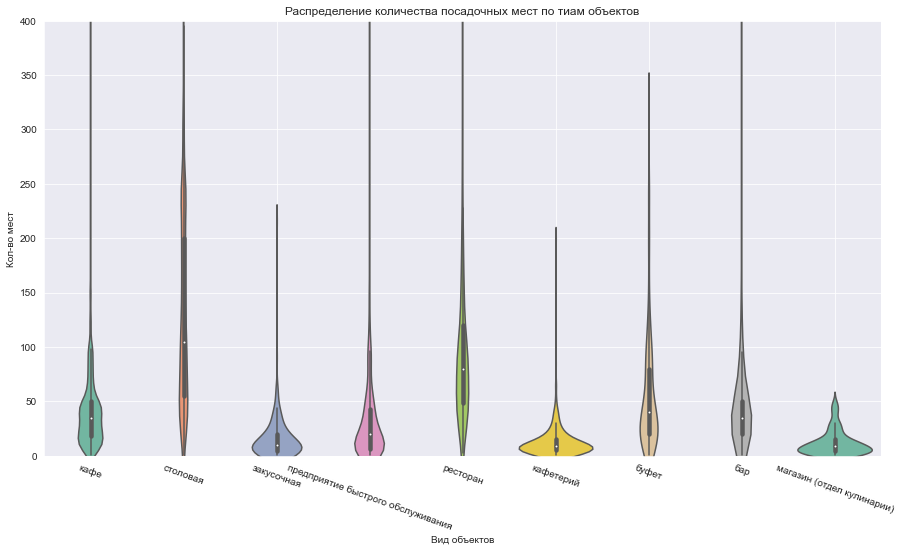

In [33]:
plt.figure(figsize=(15,8))
plt.ylim(0,400)
plt.title('Распределение количества посадочных мест по тиам объектов')
sns.violinplot(x="object_type", y="number", data=rest_data.query('number > 0'), palette='Set2')
plt.grid()
plt.xlabel('Вид объектов')
plt.ylabel('Кол-во мест')
plt.xticks(rotation=-20)
plt.show();

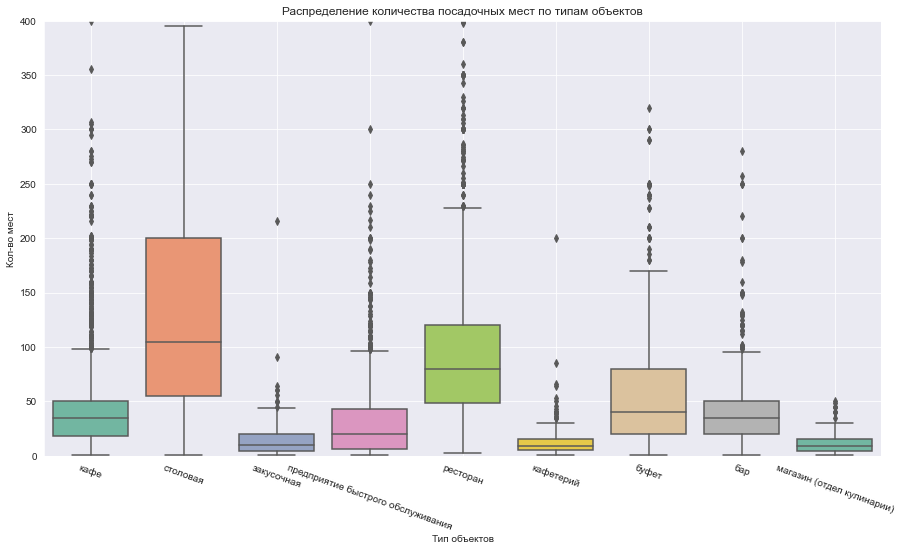

In [34]:
plt.figure(figsize=(15,8))
plt.ylim(0,400)
plt.title('Распределение количества посадочных мест по типам объектов')
sns.boxplot(x="object_type", y="number", data=rest_data.query('number > 0'), palette='Set2')
plt.grid()
plt.xlabel('Тип объектов')
plt.ylabel('Кол-во мест')
plt.xticks(rotation=-20)
plt.show();

In [35]:
print('Описание кол-ва посадочных мест по типам объектов')
df_ = rest_data.query('number > 0').groupby('object_type')['number'].describe().sort_values(by='50%', ascending=False).reset_index()
df_

Описание кол-ва посадочных мест по типам объектов


,object_type,count,mean,std,min,25%,50%,75%,max
0,столовая,2568.0,131.210280,94.866549,1.0,55.0,104.5,200.0,1400.0
1,ресторан,2240.0,98.779464,94.694330,2.0,48.0,80.0,120.0,1500.0
2,буфет,517.0,57.854932,56.583103,1.0,20.0,40.0,80.0,320.0
3,бар,828.0,44.964976,67.721922,1.0,20.0,35.0,50.0,1700.0
4,кафе,5789.0,41.842805,37.550917,1.0,18.0,35.0,50.0,533.0
5,предприятие быстрого обслуживания,1219.0,32.421657,44.019413,1.0,6.0,20.0,42.5,580.0
6,закусочная,171.0,16.017544,21.213335,1.0,4.0,10.0,20.0,216.0
7,кафетерий,285.0,12.740351,15.916240,1.0,5.0,9.0,15.0,200.0
8,магазин (отдел кулинарии),128.0,11.921875,11.518290,1.0,4.0,8.5,15.0,50.0


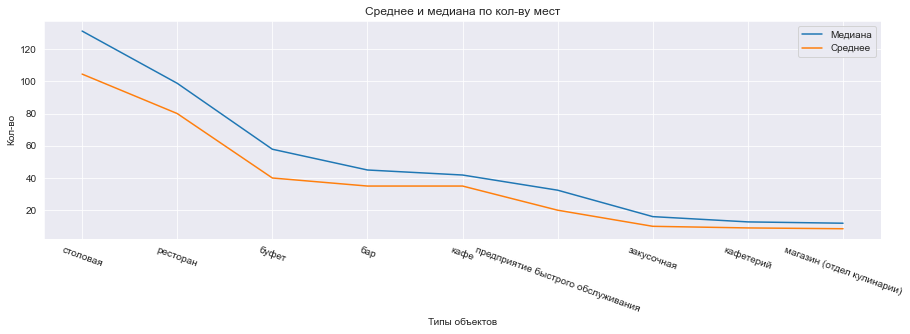

In [36]:
plt.rcParams["figure.figsize"] = (15, 4)
plt.plot(df_.object_type, df_['mean'], label='Медиана')
plt.plot(df_.object_type, df_['50%'], label='Среднее')

plt.xticks(rotation=-20) 
plt.legend()
plt.xticks(df_.object_type)
plt.title('Среднее и медиана по кол-ву мест')
plt.xlabel('Типы объектов')
plt.ylabel('Кол-во')
plt.grid()
plt.show()

### **Вывод**
* Среднее количество посадочных мест максимально у столовых - 131.2, ресторанов - 98.78, буфетов - 57.85
* Минимальное - у магазинов с отделом кулинарии - 12, кафетериев - 12.74, закусочных - 16
* Медианное количество посадочных мест максимально у столовых - 104.5, ресторанов - 80, буфетов - 40
* Минимальное - у магазинов с отделом кулинарии - 8.5, кафетериев - 9, закусочных - 10

## Выделение улицы в отдельный столбец

In [37]:
import re 
# переулки, площади, посёлки, проезды, проектируемые проезды, просеки, проспекты, тупики и шоссе
# аллеи, бульвары, деревни, кварталы, линии, микрорайоны, мосты, набережные, парки

words = ['проезд','пр.','прзд.','шоссе','шос.','ш.','улица','ул.','переулок','пер.','микрорайон','мкр.','мкрн.', \
         'мкад','Московской Кольцевой Автодороги','деревня','проспект','пр.','площадь','пл','село','аллея','бульвар', \
         'набережная','наб.','тупик','линия','посёлок','территория','квартал','просек','вблизи', 'парк','мост']
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))
rest_data["street"] = rest_data["address"].str.extract(str_pat, flags=re.I)
rest_data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [38]:
print('Кол-во невнесенных улиц', len(rest_data.query('street.isna()', engine='python')))
rest_data.query('street.isna()', engine='python').head()

Кол-во невнесенных улиц 192


,id,object_name,chain,object_type,address,number,street
859,23601,буфет - гбоу сош № 64,нет,буфет,"Партизанская улица, дом 30",100,NaN
860,23604,буфет - гбоу 60,нет,буфет,"Партизанская улица, дом 30",100,NaN
1405,20199,это,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,NaN
1406,68113,френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,NaN
1407,20105,кафе «граф монте-кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,NaN


In [39]:
print('Доля кол-ва объктов без улицы: ', round(len(rest_data.query('street.isna()', engine='python')) / len(rest_data),3), '%')

Доля кол-ва объктов без улицы:  0.012 %


## Топ-10 улиц по количеству объектов

In [40]:
rest_data.query('street.notna()', engine='python').head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [41]:
top10_street = rest_data.query('street.notna()', engine='python').groupby('street',as_index=False).id.count()\
    .sort_values('id', ascending=False).head(10).reset_index(drop=True)
top10_street.columns = ['street', 'quant']
top10_street

,street,quant
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


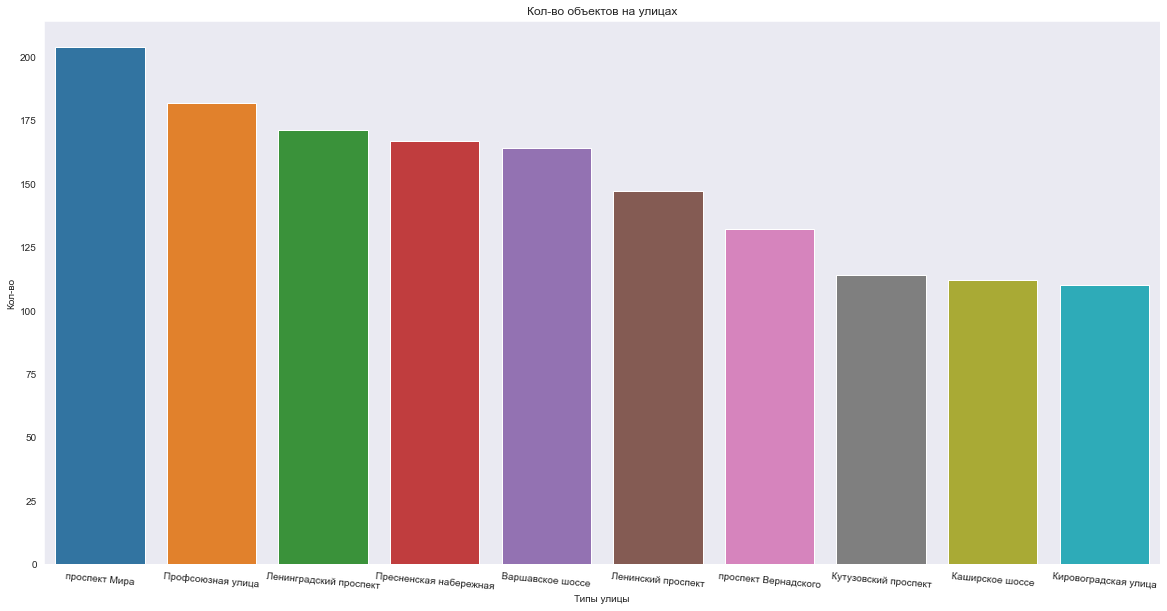

In [42]:
fig, ax = plt.subplots()
ax = sns.barplot(x='street', y='quant',   data=top10_street)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-5)
ax.set_title('Кол-во объектов на улицах')
ax.set_xlabel('Типы улицы')
ax.set_ylabel('Кол-во') 
# ax.legend(chains.object_type)
sns.set_style("dark")
fig.set_figheight(10)  # высота
fig.set_figwidth(20)  # ширина

### **Вывод**
Районы, в которых располагаются улицы:
* ***проспект Мира***:
* **Район**: Мещанский; Марьина Роща; Алексеевский; Останкинский; Свиблово; Ростокино


* ***Профсоюзная улица***:
* **Район**: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
    
    
* **Ленинградский проспект**
* **Район**: Район: Беговой, Аэропорт, Сокол, Хорошёвский
    
    
* **Пресненская набережная**
* **Район**: Пресненский
    
    
* **Варшавское шоссе**
* **Район**: Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное ЮАО и Северное Бутово, Южное Бутово
   
   
    
* **Ленинский проспект**
* **Район**: Гагаринский, Донской, Ломоносовский, Обручевский, Проспект Вернадского, Тёплый Стан, Тропарёво-Никулино и Якиманка
    
    
* **проспект Вернадского**
* **Район**: Гагаринский, Ломоносовский, Проспект Вернадского, Раменки и Тропарёво-Никулино


* **Кутузовский проспект**
* **Район**: Дорогомилово и Фили-Давыдково


* **Каширское шоссе**
* **Район**: Москворечье-Сабурово, Нагатино-Садовники, Северное Орехово-Борисово и Южное Орехово-Борисово
    
    
* **Кировоградская улица**
* **Район**: Северное Чертаново, Центральное Чертаново и Южное Чертаново


(данные собраны вручну)

## Улицы с одним объектом общественного питания, районы, в которых находятся эти улицы

In [43]:
one_street = rest_data.query('street.notna()', engine='python').groupby('street',as_index=False).id.count()\
    .sort_values('id', ascending=False).reset_index(drop=True) # дф без пропусков улиц
one_street.columns = ['street', 'quant']
print("Кол-во улиц с одной точкой общественого питания: ", one_street.query('quant == 1').quant.count())

Кол-во улиц с одной точкой общественого питания:  595


Обратмся к внешенму источнику для добавления районов

ссылка страницы: https://frs.noosphere.ru/xmlui/handle/20.500.11925/714058?show=full

ссылка файла: https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y


In [44]:
df_mosgaz_streets = pd.read_csv("https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y")
df_mosgaz_streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [45]:
# ф-ция добавления районов
def region(street):
    areas_list = df_mosgaz_streets.query('streetname == @street').area.tolist()
    if areas_list == []:
        return np.nan
    return areas_list

rest_data['areas'] = rest_data.street.apply(region)
rest_data.head()

,id,object_name,chain,object_type,address,number,street,areas
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,[Ярославский Район]
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,"[Таганский район, Нижегородский район, Район Ю..."
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,[Таганский район]
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,[Район Лианозово]
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,[Район Лианозово]


In [46]:
one_streets1 = rest_data.groupby('street', as_index=False).agg({'id':'count','areas':'min'}).query('id==1')
display(one_streets1.head())
print("Кол-во пропусков районов для улиц с одним объектом общепита: ", one_streets1.areas.isna().sum())

,street,id,areas
2,1-й Балтийский переулок,1,[Район Аэропорт]
3,1-й Басманный переулок,1,"[Басманный район, Красносельский район]"
4,1-й Ботанический проезд,1,[Район Свиблово]
7,1-й Вешняковский проезд,1,[Рязанский район]
9,1-й Голутвинский переулок,1,[Район Якиманка]


Кол-во пропусков районов для улиц с одним объектом общепита:  73


Рассмотрим другой источник для заполнения пропусков:
https://hubofdata.ru/dataset/msc_data/resource/74026497-e4da-43fc-a0e5-6f0526fab631


http://hubofdata.ru/dataset/33a4af2e-22b7-4b15-bb38-1c435842c494/resource/74026497-e4da-43fc-a0e5-6f0526fab631/download/moscow.csv"

    

In [47]:
url = 'https://drive.google.com/file/d/1Xg_96_IUtK29wFNJyM84ZaONoD8d6Yge/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
hub_streets = pd.read_csv(path)
hub_streets.columns=['i','area','street']
hub_streets

,i,area,street
0,0,Академический,60-летия Октября пр-т
1,1,Академический,Большая Черёмушкинская ул.
2,2,Академический,Вавилова ул.
3,3,Академический,Винокурова ул.
4,4,Академический,Гримау ул.
...,...,...,...
5222,5222,Ясенево,Севастопольский пр-т
5223,5223,Ясенево,Соловьиный пр.
5224,5224,Ясенево,Тарусская ул.
5225,5225,Ясенево,Тютчевская ал.


Приведем название улиц к полному виду

In [48]:
streets_shorts_dict = {
    'бул.':'бульвар',
    'ул.':'улица',
    'пер.':'переулок',
    'дер.':'деревня',
    'пл':'площадь',
    'лин.':'линия',
    'л.':'линия',
    'с.':'село',
    'прос.':'просека',
    'тер.':'территория',
    'мкр.':'микрорайон',
    'мкрн.':'микрорайон',
    'пр-т':'проспект',
    'кв.':'квартал',
    'наб.':'набережная',
    'туп.':'тупик',
    'пос.':'посёлок',
    'ал.':'аллея',
    'пр.':'проезд',
    'ш.':'шоссе',
    'шос.':'шоссе'
}

def streets_full(name):
    for street in streets_shorts_dict:
        if street in name:
            return name.replace(street, streets_shorts_dict[street])
    return name

hub_streets['street_full'] = hub_streets.street.apply(streets_full)
hub_streets.head()

,i,area,street,street_full
0,0,Академический,60-летия Октября пр-т,60-летия Октября проспект
1,1,Академический,Большая Черёмушкинская ул.,Большая Черёмушкинская улица
2,2,Академический,Вавилова ул.,Вавилова улица
3,3,Академический,Винокурова ул.,Винокурова улица
4,4,Академический,Гримау ул.,Гримау улица


In [49]:
# ф-ция добавления районов из источника hub
def region_hub(street):
    areas_list = hub_streets.query('street_full == @street').area.tolist()
    if areas_list == []:
        return np.nan
    return areas_list

In [50]:
one_streets_nan = one_streets1.query('areas.isna()', engine='python').copy()
one_streets_nan.areas = one_streets_nan.street.apply(region_hub)
print("Кол-во оставшихся пропусков: ", one_streets_nan.query("areas.isna()",engine='python').id.count())
print("Кол-во заполненных пропусков: ", one_streets_nan.query("areas.notna()",engine='python').id.count())

Кол-во оставшихся пропусков:  59
Кол-во заполненных пропусков:  14


* На начальном этапе из 595 улиц 73 из них не имели районной принадлежности
* в итоге удалось заполнить дополнительно 14 позиций

In [51]:
one_street_p1 = one_streets1.query('areas.notna()',engine='python')
one_street_p2 = one_streets_nan.query("areas.notna()",engine='python')
one_street_final = pd.concat([one_street_p1, one_street_p2])
one_street = one_street_final.reset_index(drop=True)
one_street.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  536 non-null    object
 1   id      536 non-null    int64 
 2   areas   536 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.7+ KB


In [52]:
# Список районов с одой точкой общепита на улице
areas_list = one_street.areas.tolist()
final_areas_list =[]
for i in range(len(areas_list)):
    for j in range(len(areas_list[i])):
        if areas_list[i][j] not in final_areas_list:
            final_areas_list.append(areas_list[i][j])
print(sorted(final_areas_list), '\n')
print("Кол-во районов: ", len(final_areas_list))

['Алексеевский район', 'Алтуфьевский район', 'Бабушкинский район', 'Басманный район', 'Бескудниковский Район', 'Бутырский район', 'Войковский Район', 'Головинский район', 'Даниловский район', 'Дмитровский район', 'Донской район', 'Красносельский район', 'Лосиноостровский район', 'Мещанский район', 'Можайский Район', 'Молжаниновский', 'Молжаниновский район', 'Нагорный район', 'Нижегородский район', 'Новомосковский', 'Обручевский район', 'Останкинский район', 'Панфиловский район', 'Пресненский район', 'Район Арбат', 'Район Аэропорт', 'Район Беговой', 'Район Бирюлево Восточное', 'Район Богородское', 'Район Внуково', 'Район Восточное Измайлово', 'Район Восточный', 'Район Выхино-Жулебино', 'Район Гагаринский', 'Район Гольяново', 'Район Дорогомилово', 'Район Замоскворечье', 'Район Западное Дегунино', 'Район Зюзино', 'Район Ивановское', 'Район Измайлово', 'Район Коньково', 'Район Коптево', 'Район Косино-Ухтомский', 'Район Котловка', 'Район Крюково', 'Район Кузьминки', 'Район Кунцево', 'Район 

### **Вывод**
* Кол-во улиц с одним объектом общепита равно 595
* Районы с такими улицами в количестве 106:

'Алексеевский район',
 'Алтуфьевский район',
 'Бабушкинский район',
 'Басманный район',
 'Бескудниковский Район',
 'Бутырский район',
 'Войковский Район',
 'Головинский район',
 'Даниловский район',
 'Дмитровский район',
 'Донской район',
 'Красносельский район',
 'Лосиноостровский район',
 'Мещанский район',
 'Можайский Район',
 'Молжаниновский',
 'Молжаниновский район',
 'Нагорный район',
 'Нижегородский район',
 'Новомосковский',
 'Обручевский район',
 'Останкинский район',
 'Панфиловский район',
 'Пресненский район',
 'Район Арбат',
 'Район Аэропорт',
 'Район Беговой',
 'Район Бирюлево Восточное',
 'Район Богородское',
 'Район Внуково',
 'Район Восточное Измайлово',
 'Район Восточный',
 'Район Выхино-Жулебино',
 'Район Гагаринский',
 'Район Гольяново',
 'Район Дорогомилово',
 'Район Замоскворечье',
 'Район Западное Дегунино',
 'Район Зюзино',
 'Район Ивановское',
 'Район Измайлово',
 'Район Коньково',
 'Район Коптево',
 'Район Косино-Ухтомский',
 'Район Котловка',
 'Район Крюково',
 'Район Кузьминки',
 'Район Кунцево',
 'Район Куркино',
 'Район Левобережный',
 'Район Лефортово',
 'Район Люблино',
 'Район Марфино',
 'Район Марьина роща',
 'Район Марьино',
 'Район Матушкино-Савелки',
 'Район Метрогородок',
 'Район Митино',
 'Район Москворечье-Сабурово',
 'Район Ново-Переделкино',
 'Район Новогиреево',
 'Район Отрадное',
 'Район Очаково-Матвеевское',
 'Район Перово',
 'Район Печатники',
 'Район Покровское-Стрешнево',
 'Район Преображенское',
 'Район Раменки',
 'Район Ростокино',
 'Район Свиблово',
 'Район Северное Бутово',
 'Район Северное Измайлово',
 'Район Северное Медведково',
 'Район Северный',
 'Район Сокол',
 'Район Соколиная Гора',
 'Район Сокольники',
 'Район Солнцево',
 'Район Строгино',
 'Район Текстильщики',
 'Район Филевский Парк',
 'Район Фили-Давыдково',
 'Район Хамовники',
 'Район Хорошево-Мневники',
 'Район Царицыно',
 'Район Черемушки',
 'Район Чертаново Северное',
 'Район Чертаново Южное',
 'Район Щукино',
 'Район Южное Бутово',
 'Район Южное Медведково',
 'Район Южное Тушино',
 'Район Якиманка',
 'Район Ясенево',
 'Рязанский район',
 'Савеловский район',
 'Таганский район',
 'Тверской район',
 'Тимирязевский Район',
 'Троицкий',
 'Хорошево-Мневники',
 'Хорошевский район',
 'Южное Бутово',
 'Южнопортовый Район',
 'Якиманка',
 'Ярославский Район'

## Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [53]:
top10_list = top10_street.street.tolist()
top10_list

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица']

In [54]:
rest_data.query('street in @top10_list', engine='python').head() #фильтр исходного файла по топ-10 улицам

,id,object_name,chain,object_type,address,number,street,areas
151,155973,андерсон,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново ..."
152,23618,subway,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново ..."
153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново ..."
154,152556,шаурма,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново ..."
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново ..."


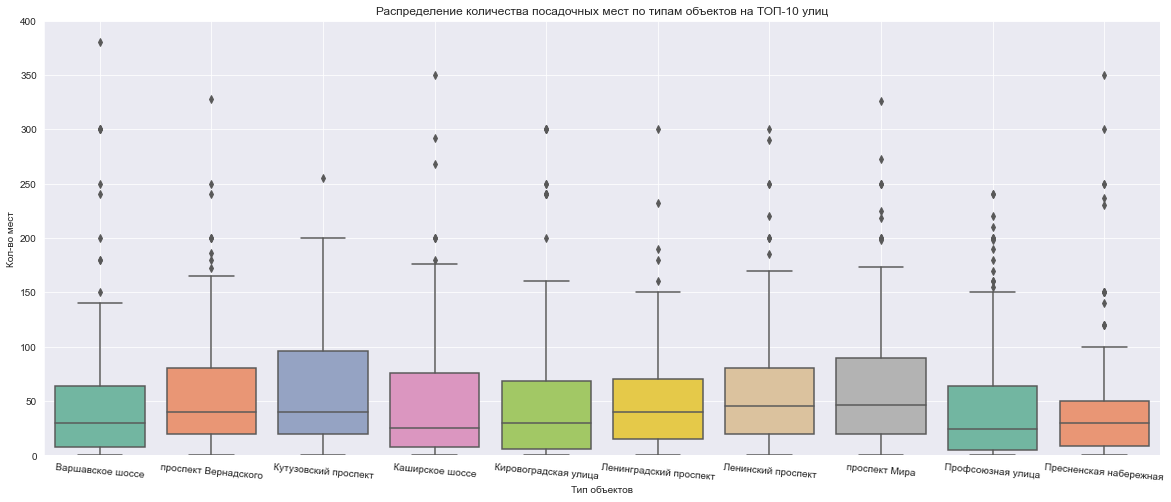

In [55]:
plt.figure(figsize=(20,8))
plt.ylim(0,400)
plt.title('Распределение количества посадочных мест по типам объектов на ТОП-10 улиц')
sns.boxplot(x="street", y="number", data=rest_data.query('street in @top10_list', engine='python'), palette='Set2')
plt.grid()
plt.xlabel('Тип объектов')
plt.ylabel('Кол-во мест')
plt.xticks(rotation=-5)
plt.show();

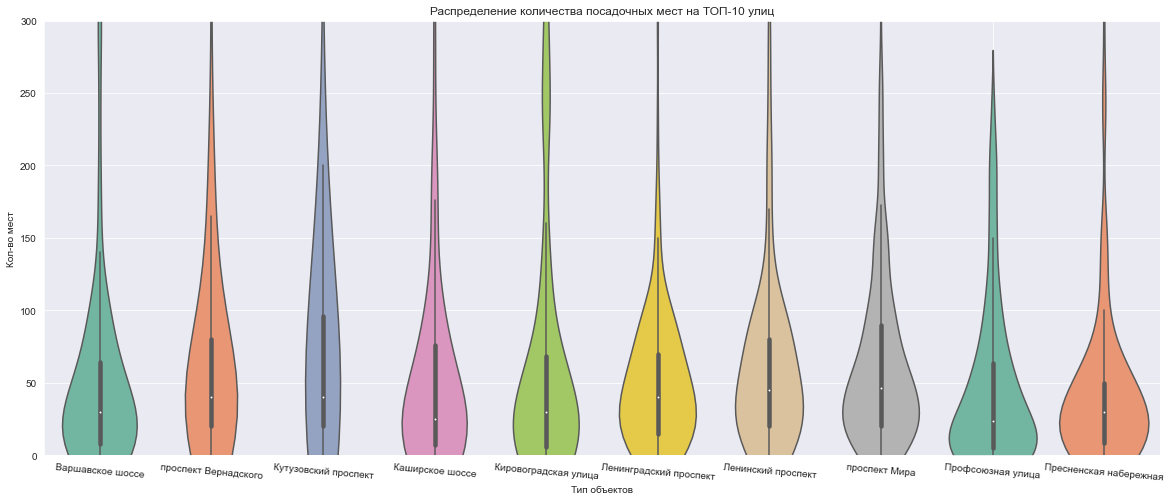

In [56]:
plt.figure(figsize=(20,8))
plt.ylim(0,300)
plt.title('Распределение количества посадочных мест на ТОП-10 улиц')
sns.violinplot(x="street", y="number", data=rest_data.query('street in @top10_list ', engine='python'), palette='Set2')
plt.grid()
plt.xlabel('Тип объектов')
plt.ylabel('Кол-во мест')
plt.xticks(rotation=-5)
plt.show();

In [57]:
descr = rest_data.query('street in @top10_list', engine='python').groupby('street').\
    number.describe().sort_values('50%', ascending=False).reset_index()
print('Распределение посадочных мест на ТОП-10 улицах')
display(descr)
print('Распределение кол-ва заведений на ТОП-10 улицах')
display(descr['count'].describe().to_frame())

Распределение посадочных мест на ТОП-10 улицах


,street,count,mean,std,min,25%,50%,75%,max
0,проспект Мира,204.0,62.696078,58.972447,0.0,20.0,46.5,90.00,326.0
1,Ленинский проспект,147.0,63.469388,67.969706,0.0,20.0,45.0,80.00,495.0
2,Кутузовский проспект,114.0,85.061404,194.464196,0.0,20.0,40.0,96.00,1700.0
3,Ленинградский проспект,171.0,52.690058,63.181930,0.0,15.0,40.0,70.00,625.0
4,проспект Вернадского,132.0,66.969697,121.864331,0.0,20.0,40.0,80.00,1288.0
5,Варшавское шоссе,164.0,52.475610,74.530387,0.0,8.0,30.0,64.25,500.0
6,Кировоградская улица,110.0,59.790909,79.166077,0.0,6.0,30.0,68.50,300.0
7,Пресненская набережная,167.0,45.844311,65.316834,0.0,8.5,30.0,50.00,478.0
8,Каширское шоссе,112.0,55.098214,87.670756,0.0,7.5,25.0,76.25,680.0
9,Профсоюзная улица,182.0,46.412088,56.146419,0.0,5.0,24.0,63.75,240.0


Распределение кол-ва заведений на ТОП-10 улицах


,count
count,10.000000
mean,150.300000
std,32.554399
min,110.000000
25%,118.500000
50%,155.500000
75%,170.000000
max,204.000000


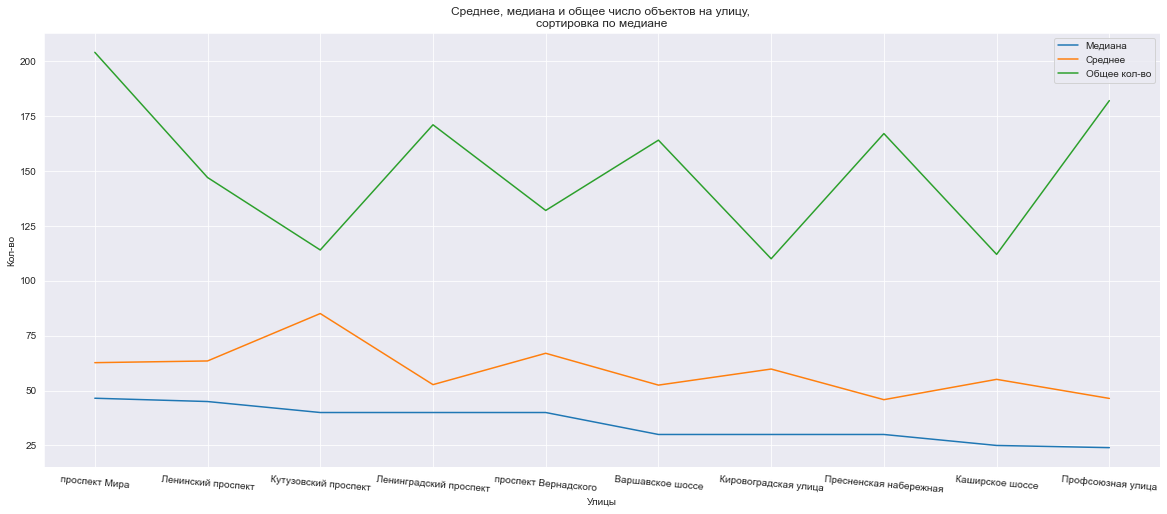

In [58]:
plt.rcParams["figure.figsize"] = (20, 8)
plt.plot(descr.street, descr['50%'], label='Медиана')
plt.plot(descr.street, descr['mean'], label='Среднее')
plt.plot(descr.street, descr['count'], label='Общее кол-во')

plt.xticks(rotation=-5) 
plt.legend()
plt.xticks(descr.street)
plt.title('Среднее, медиана и общее число объектов на улицу, \nсортировка по медиане')
plt.xlabel('Улицы')
plt.ylabel('Кол-во')
plt.grid()
plt.show()

### **Вывод**

* ТОП-10 улиц с максимальным количеством объектов: 

'проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица'
 
* максимальное кол-во заведение находится на Проспекте Мира: 204
* минимальное – на Кировоградской улице: 110
* среднее кол-во заведений: 150
* медианное значение кол-ва заведений: 155,5
* медианное значение кол-ва мест для посетителей ниже среднего на всех улицах из списка ТОП-10
* минимальное медианное – на Профсоюзной улице: 24
* максимальное медианное – на проспекте Мира: 46,5
* наиболее широких разброс по количеству посадочных мест соответствует Кутузовскому проспекту (от 0 до 1700)
* наименее выражено отличие по кол-ву посадочных мест – на Профсоюзной улице (от 0 до 240)




## Общий вывод

**Анализ и предобработка данных**

* данные представлены в одном файле
* пропуски и дубликаты отсутствуют
* название колонок проработаны на соответствие ***snake_style***
* данные "название объекта", "принадлежность к сети", "тип объекта" и "адрес" представлены в виде строк
* id и кол-во мест для посетителей представлены в виде целых чисел


**Соотношение типов объектов общественного питания по количеству**

* Максимальные доли типов объектов по количеству посадочных мест занимают: кафе - 39,7%, столовые - 16,8%, рестораны - 14,9%
* Минимальные: магазины с отделами кулинарии - 1,78%, закусочные - 2,34% и кафетерии - 2,59%

**Соотношение сетевых и несетевых заведений по количеству**
* 80,7% рынка по количеству занимают несетевые объекты, 19,3% - сетевые

**Для каких типов объектов больше соответствует сетевое распределение**
* к сетевому формату тяготеют такие типы объектов питания, как предприятия быстрого питания, магазины (отдел кулинарии), рестораны и кафе

**Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?**

Меньшему кол-ву точек питания соотв-ет большое число посадочных мест.

А также:
* более половины сетевых структур питания имеет до 11 посадочных мест
* Медианное значение посадочных мест - 14,6
* Среднее кол-во посадочных мест - 4
* данные представлены для 174 компаний

**Среднее кол-во посадочных мест по типам объектов**
* Среднее количество посадочных мест максимально у столовых - 131.2, ресторанов - 98.78, буфетов - 57.85
* Минимальное - у магазинов с отделом кулинарии - 12, кафетериев - 12.74, закусочных - 16
* Медианное количество посадочных мест максимально у столовых - 104.5, ресторанов - 80, буфетов - 40
* Минимальное - у магазинов с отделом кулинарии - 8.5, кафетериев - 9, закусочных - 10

**Топ-10 улиц по количеству объектов**
Районы, в которых располагаются улицы:
* ***проспект Мира***:
* **Район**: Мещанский; Марьина Роща; Алексеевский; Останкинский; Свиблово; Ростокино


* ***Профсоюзная улица***:
* **Район**: Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево
    
    
* **Ленинградский проспект**
* **Район**: Район: Беговой, Аэропорт, Сокол, Хорошёвский
    
    
* **Пресненская набережная**
* **Район**: Пресненский
    
    
* **Варшавское шоссе**
* **Район**: Донской, Нагатино-Садовники, Нагорный, Чертаново Северное, Чертаново Центральное, Чертаново Южное ЮАО и Северное Бутово, Южное Бутово
   
   
    
* **Ленинский проспект**
* **Район**: Гагаринский, Донской, Ломоносовский, Обручевский, Проспект Вернадского, Тёплый Стан, Тропарёво-Никулино и Якиманка
    
    
* **проспект Вернадского**
* **Район**: Гагаринский, Ломоносовский, Проспект Вернадского, Раменки и Тропарёво-Никулино


* **Кутузовский проспект**
* **Район**: Дорогомилово и Фили-Давыдково


* **Каширское шоссе**
* **Район**: Москворечье-Сабурово, Нагатино-Садовники, Северное Орехово-Борисово и Южное Орехово-Борисово
    
    
* **Кировоградская улица**
* **Район**: Северное Чертаново, Центральное Чертаново и Южное Чертаново

**Улицы с одним объектом общественного питания, районы, в которых находятся эти улицы**
* Кол-во улиц с одним объектом общепита равно 595
* Районы с такими улицами в количестве 106:

'Алексеевский район',
 'Алтуфьевский район',
 'Бабушкинский район',
 'Басманный район',
 'Бескудниковский Район',
 'Бутырский район',
 'Войковский Район',
 'Головинский район',
 'Даниловский район',
 'Дмитровский район',
 'Донской район',
 'Красносельский район',
 'Лосиноостровский район',
 'Мещанский район',
 'Можайский Район',
 'Молжаниновский',
 'Молжаниновский район',
 'Нагорный район',
 'Нижегородский район',
 'Новомосковский',
 'Обручевский район',
 'Останкинский район',
 'Панфиловский район',
 'Пресненский район',
 'Район Арбат',
 'Район Аэропорт',
 'Район Беговой',
 'Район Бирюлево Восточное',
 'Район Богородское',
 'Район Внуково',
 'Район Восточное Измайлово',
 'Район Восточный',
 'Район Выхино-Жулебино',
 'Район Гагаринский',
 'Район Гольяново',
 'Район Дорогомилово',
 'Район Замоскворечье',
 'Район Западное Дегунино',
 'Район Зюзино',
 'Район Ивановское',
 'Район Измайлово',
 'Район Коньково',
 'Район Коптево',
 'Район Косино-Ухтомский',
 'Район Котловка',
 'Район Крюково',
 'Район Кузьминки',
 'Район Кунцево',
 'Район Куркино',
 'Район Левобережный',
 'Район Лефортово',
 'Район Люблино',
 'Район Марфино',
 'Район Марьина роща',
 'Район Марьино',
 'Район Матушкино-Савелки',
 'Район Метрогородок',
 'Район Митино',
 'Район Москворечье-Сабурово',
 'Район Ново-Переделкино',
 'Район Новогиреево',
 'Район Отрадное',
 'Район Очаково-Матвеевское',
 'Район Перово',
 'Район Печатники',
 'Район Покровское-Стрешнево',
 'Район Преображенское',
 'Район Раменки',
 'Район Ростокино',
 'Район Свиблово',
 'Район Северное Бутово',
 'Район Северное Измайлово',
 'Район Северное Медведково',
 'Район Северный',
 'Район Сокол',
 'Район Соколиная Гора',
 'Район Сокольники',
 'Район Солнцево',
 'Район Строгино',
 'Район Текстильщики',
 'Район Филевский Парк',
 'Район Фили-Давыдково',
 'Район Хамовники',
 'Район Хорошево-Мневники',
 'Район Царицыно',
 'Район Черемушки',
 'Район Чертаново Северное',
 'Район Чертаново Южное',
 'Район Щукино',
 'Район Южное Бутово',
 'Район Южное Медведково',
 'Район Южное Тушино',
 'Район Якиманка',
 'Район Ясенево',
 'Рязанский район',
 'Савеловский район',
 'Таганский район',
 'Тверской район',
 'Тимирязевский Район',
 'Троицкий',
 'Хорошево-Мневники',
 'Хорошевский район',
 'Южное Бутово',
 'Южнопортовый Район',
 'Якиманка',
 'Ярославский Район'

**Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания**

* ТОП-10 улиц с максимальным количеством объектов: 

'проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица'
 
* максимальное кол-во заведение находится на Проспекте Мира: 204
* минимальное – на Кировоградской улице: 110
* среднее кол-во заведений: 150
* медианное значение кол-ва заведений: 155,5
* медианное значение кол-ва мест для посетителей ниже среднего на всех улицах из списка ТОП-10
* минимальное медианное – на Профсоюзной улице: 24
* максимальное медианное – на проспекте Мира: 46,5
* наиболее широких разброс по количеству посадочных мест соответствует Кутузовскому проспекту (от 0 до 1700)
* наименее выражено отличие по кол-ву посадочных мест – на Профсоюзной улице (от 0 до 240)



## **Возможность развития**
* Представленные данные для анализа, а также выводы, полученные в результате него, в случае открытия точки питания могут служить лишь дополнительной основой для составления заключения о рекомендации к развитию сети.
* В текущем случае в проекте точки/сети общественного питания имеется необчная особенность, а именно - обслуживание роботами. В связи с этим стоит обратить внимание на магистральные дорожные направления г.Москвы из ТОП-10
* Проходимость на данных магистралях и выше, чем на остальных, и хотя стоит обратить внимание на конкурентность, заказчик имеет уникальное свойство, что должно положительно сказаться на заметность среди конкурентов



Источники данных

1.
ссылка страницы: https://frs.noosphere.ru/xmlui/handle/20.500.11925/714058?show=full

ссылка файла: https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y

2.
ссылка страницы: https://hubofdata.ru/dataset/msc_data/resource/74026497-e4da-43fc-a0e5-6f0526fab631

ссылка файла: http://hubofdata.ru/dataset/33a4af2e-22b7-4b15-bb38-1c435842c494/resource/74026497-e4da-43fc-a0e5-6f0526fab631/download/moscow.csv"


**ссылка на презентацию**: https://disk.yandex.ru/d/2rqe46gr_dIoYA
        